# Garbage Collection

* In old languages like **C++**, the programmer is responsible for both the creation and destruction of objects.
    * Usually, programmers take very much care while creating objects, but neglect the destruction of useless objects.
    * Because of this neglect, total memory can be filled with useless objects which creates memory problems.
    * Total application will be down with **out-of-memory errors**.
* But in Python, We have some assistant which is always running in the background to destroy useless objects.
    * Because of this assistant, the chance of failing Python programs with memory problems is very less.
    * This assistant is nothing but **Garbage Collector**.
* Hence **the main objective of the Garbage Collector is to destroy useless objects**.
* If an object does not have any reference variable then that object is eligible for Garbage Collection.

# Enable and disable the garbage collector

By default, the garbage collector is **enabled**, but we can disable based on our requirements. 

In this context, we can use the following functions of `gc` module.
* `gc.isenabled( )` →  Returns True if GC enabled.
* `gc.disable( )` →  To disable GC explicitly.
* `gc.enable( )` → To enable GC explicitly.

In [1]:
import gc

print(gc.isenabled())   # True

gc.disable()
print(gc.isenabled())   # False

gc.enable()
print(gc.isenabled())   # True

True
False
True


# Destructors

* Destructor is a special method and the name should be **`__del__`**. 
* Just before destroying an object **Garbage Collector** always calls the **destructor** to perform clean-up activities ( Resource deallocation activities like closing database connection etc ). 
* Once destructor execution is completed, the Garbage Collector automatically destroys that object.

> ***NOTE:** The job of destructor is **not to destroy objects** and it is just **to perform clean-up activities**.* 

In [3]:
import time

class Test:
  def __init__(self):
    print("Object Initialization...")

  def __del__(self):
    print("Fulfilling Last Wish and performing clean up activities...")

t1=Test()                       # Object Initialization...
t1=None                         
time.sleep(5)               
                                # Fulfilling Last Wish and performing clean up activities...
                                
print("End of application")     # End of application

Object Initialization...
Fulfilling Last Wish and performing clean up activities...
End of application


> **NOTE:** 
> * *If the object does not contain any reference variable then only it is eligible for GC.*
> * *That is, if the reference count is zero then only the object eligible for GC.* 

In [4]:
import time

class Test:
  def __init__(self):
    print("Constructor Execution...")

  def __del__(self):
    print("Destructor Execution...")

t1=Test()
t2=t1
t3=t2
del t1
time.sleep(5)
print("object not yet destroyed after deleting t1")
del t2
time.sleep(5)
print("object not yet destroyed even after deleting t2")
print("I am trying to delete last reference variable...")
del t3

Constructor Execution...
object not yet destroyed after deleting t1
object not yet destroyed even after deleting t2
I am trying to delete last reference variable...
Destructor Execution...


> **NOTE:**
> * *For a list containing objects in it, if the list doesn’t have any reference then it will be destroyed by GC regardless of having objects in it.*
> * *That is, if the list object is eligible for GC means all objects inside the list is also eligible for GC.*

In [5]:
import time
class Test:
  def __init__(self):
    print("Constructor Execution...")

  def __del__(self):
    print("Destructor Execution...")

list=[Test(),Test(),Test()]

del list
time.sleep(5)
print("End of application")

Constructor Execution...
Constructor Execution...
Constructor Execution...
Destructor Execution...
Destructor Execution...
Destructor Execution...
End of application


# Three important interview questions

## What is the difference between `del t1` and `t1 = None`?

**`del t1`**
* delete `t1` reference variable → As a result the object referenced by `t1` is eligible for garbage collection.
* both `t1` and its corresponding objects get deleted.
* we cannot use `t1` anymore.
* if we don’t want the object and its corresponding reference variable then we have to use this approach.

**`t1 = None`**
* reassign `t1` to points None object → As a result the existing object referenced by `t1` is eligible for garbage collection.
* only the existing object referenced by `t1` gets deleted, but variable `t1` still exists in memory and can be reused.
* we can use `t1` and it currently pointing to None object.
* If we want the reference variable but not the object, then we have to use this approach.

## Find the number of references to an object

In [6]:
# sys module contains getrefcount() function for this purpose.
# sys.getrefcount (objectreference)

import sys

class Test:
  pass
  
t1=Test()
t2=t1
t3=t1
t4=t1
print(sys.getrefcount(t1))    # 5              [ 4 + 1 ]->  python internally maintains one default reference variable self.

5


> ***NOTE:** For every object, python internally maintains one default reference variable `self`.* 

## What is the difference between a constructor and a destructor?

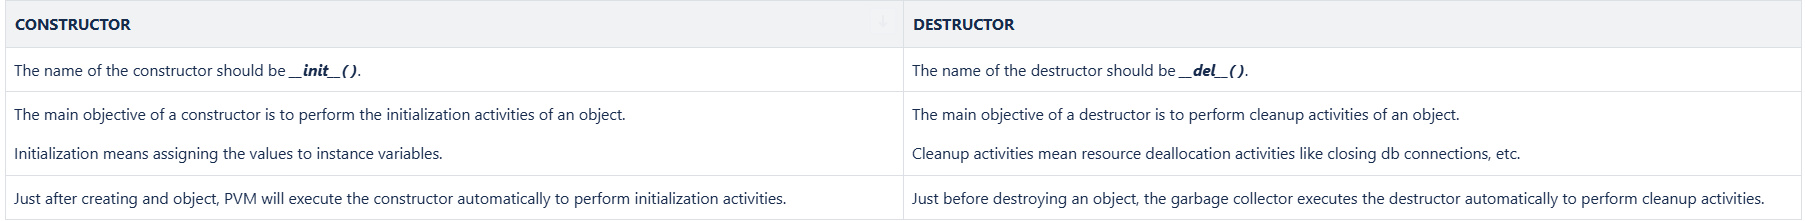